<class 'pandas.core.frame.DataFrame'>
Index: 2705 entries, 2 to 3175
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Регион                   2705 non-null   object 
 1   Год                      2705 non-null   int64  
 2   Младенческая_смертность  2705 non-null   float64
 3   region_standard          2705 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 105.7+ KB
None

Пропуски по колонкам:
 Регион                     0
Год                        0
Младенческая_смертность    0
region_standard            0
dtype: int64

Уникальных регионов: 85
Уникальных лет: 32

Статистика по младенческой смертности:
 count    2705.000000
mean      141.171165
std       152.526171
min         0.000000
25%        46.000000
50%        91.000000
75%       181.000000
max      1617.000000
Name: Младенческая_смертность, dtype: float64

Топ-5 региональных записей по смертности:
     region

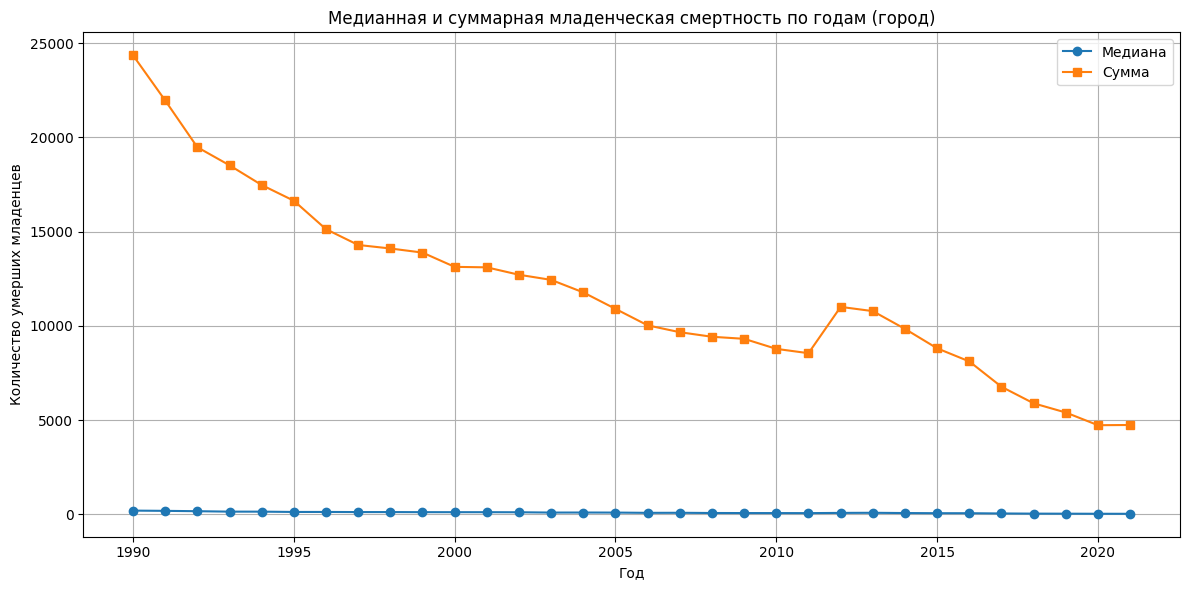

<Figure size 1600x600 with 0 Axes>

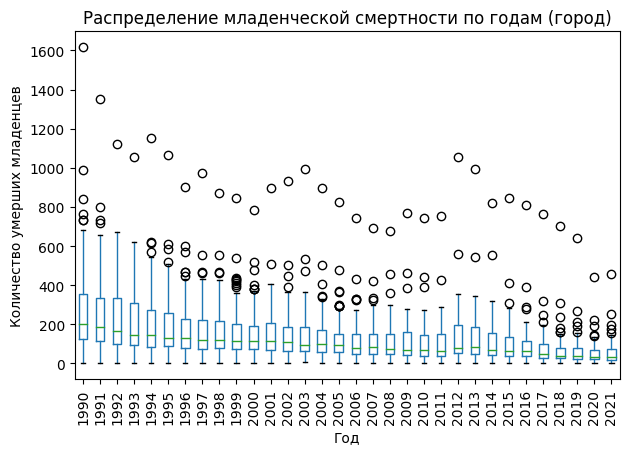

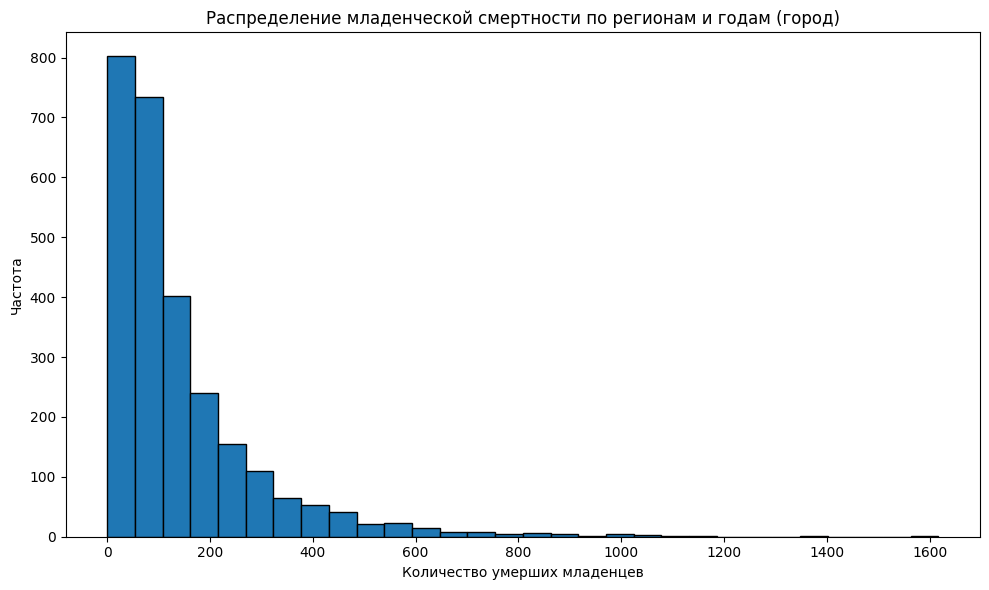

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/child_mortality_urban_standardized.csv"
df = pd.read_csv(file_path)

# 2. Оставляем только строки с region_standard
df = df[df["region_standard"].notna()]

# 3. Проверка
print(df.info())
print("\nПропуски по колонкам:\n", df.isnull().sum())
print("\nУникальных регионов:", df["region_standard"].nunique())
print("Уникальных лет:", df["Год"].nunique())

# 4. Статистика
print("\nСтатистика по младенческой смертности:\n", df["Младенческая_смертность"].describe())

# 5. Топ-5 регионов по максимальным значениям
top5 = df.sort_values(by="Младенческая_смертность", ascending=False).head(5)
print("\nТоп-5 региональных записей по смертности:\n", top5[["region_standard", "Год", "Младенческая_смертность"]])

# 6. Тренды медианы и суммы
median_mortality = df.groupby("Год")["Младенческая_смертность"].median()
sum_mortality = df.groupby("Год")["Младенческая_смертность"].sum()

plt.figure(figsize=(12,6))
plt.plot(median_mortality.index, median_mortality.values, marker="o", label="Медиана")
plt.plot(sum_mortality.index, sum_mortality.values, marker="s", label="Сумма")
plt.title("Медианная и суммарная младенческая смертность по годам (город)")
plt.xlabel("Год")
plt.ylabel("Количество умерших младенцев")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Boxplot
plt.figure(figsize=(16,6))
df.boxplot(column="Младенческая_смертность", by="Год", grid=False, rot=90)
plt.title("Распределение младенческой смертности по годам (город)")
plt.suptitle("")
plt.ylabel("Количество умерших младенцев")
plt.tight_layout()
plt.show()

# 8. Гистограмма
plt.figure(figsize=(10,6))
plt.hist(df["Младенческая_смертность"], bins=30, edgecolor="black")
plt.title("Распределение младенческой смертности по регионам и годам (город)")
plt.xlabel("Количество умерших младенцев")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()


# EDA таблицы `child_mortality_urban_standardized.csv`

**Период наблюдений**
- 1990–2021 годы
- Охвачены все регионы России

---

**Основные показатели**

| Показатель            | Сельские районы         | Городские районы           |
|------------------------|-------------------------|-----------------------------|
| Количество записей    | 2,674                  | 2,705                      |
| Среднее               | ~72                    | ~141                       |
| Медиана               | ~48                    | ~91                        |
| Максимум              | 684                    | 1,617                      |
| Основные пики         | Дагестан, Чечня (1990-е)| Москва (1990-е)            |

---

**Тренды**
- И в городах, и в селе наблюдается устойчивое снижение младенческой смертности.
- Городские показатели выше в абсолютных значениях, что связано с большей численностью населения.

---

**Причины разницы**
- Основной фактор — **численность населения**: в крупных городах рождается гораздо больше детей.
- Для корректного сравнения уровней смертности нужно использовать относительные показатели (например, на 1,000 родившихся).

---

**Визуализации**
- Boxplot и гистограммы показывают сильное скошенное распределение.
- В городах разброс значений выше из-за крупных мегаполисов.

---

**Вывод**
- Данные очищены от агрегатов и готовы для последующего анализа.
- При интерпретации важно помнить, что речь идёт об абсолютных количествах смертей.
- Для оценки качества здравоохранения необходимы относительные коэффициенты смертности.



In [2]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/child_urban_AfterEDA.csv", index=False)